In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import sys
import copy
wheel = dv.ColorWheel()

In [3]:
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\Analysis_and_Statistics') 
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp2\Analysis_and_Statistics') 
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement') 
sys.path.insert(0, r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Optimal_Model\Analysis') 
import Subject_Object_v2 
import Subject_Object 
import plot_functions as pf
# importlib.reload(Optimal_Stopping_Object_v5) # Reloads so I don't have to restart kernel if I change a function in the Object of another py file


# Select Exp1 or Exp2

In [4]:
experiment = 'Exp1'

# Initial Thangs

In [5]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'D:\\OneDrive - University of Delaware - o365\\Subject_Data\\MatchPennies_Agent_{experiment}\\Figures\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    
if experiment == 'Exp1':
    tp3_title = "1000 (50)"
    tp4_title = "1000 (150)"
    tp5_title = '1100 (50)'
    tp6_title = "1100 (150)"
    tp7_title = "1200 (50)"
    tp8_title = '1200 (150)'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    num_blocks = len(trial_block_titles)
num_subjects

20

# Pickle Data

In [6]:
if 'subject_objects' not in locals():
    load_path = r'Subjects_Analyzed'
    subject_objects = []
    for i,subname in enumerate(figures_pull_list):
        print(subname)
        subject_object = dill.load(open(load_path + f'\\{subname}\\{subname}_object.pkl', 'rb'))
        subject_objects.append(subject_object)

Sub1
Sub2
Sub3
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12
Sub13
Sub14
Sub15
Sub16
Sub17
Sub18
Sub19
Sub20


In [7]:
subject_objects_first = copy.deepcopy(subject_objects)
subject_objects_second = copy.deepcopy(subject_objects)

In [8]:
if 'vel_group_thresh' not in locals():
    # pos_group = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_pos_task_leave_time', task_movement_time_metric_name = 'player_pos_task_movement_time',
    #                                     reaction_time_metric_name = 'player_pos_reaction_time', reaction_movement_time_metric_name = 'player_pos_reaction_movement_time')
    # pos_group.analyze_data()
    # vel_group_linear = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_velocity_task_leave_time_linear',task_movement_time_metric_name = 'player_velocity_task_movement_time_linear',
    #                                     reaction_time_metric_name = 'player_velocity_reaction_time_linear', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_linear')
    # vel_group_linear.analyze_data()
    group_first = Subject_Object_v2.Group(subject_objects_first, select_trials = 'First Half', num_stds_for_reaction_time = 2, 
                                        task_leave_time_metric_name = 'player_velocity_task_leave_time_thresh',task_movement_time_metric_name = 'player_velocity_task_movement_time_thresh',
                                        reaction_time_metric_name = 'player_velocity_reaction_time_thresh', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_thresh')
    group_first.analyze_data()

    group_second = Subject_Object_v2.Group(subject_objects_second, select_trials = 'Second Half', num_stds_for_reaction_time = 2, 
                                        task_leave_time_metric_name = 'player_velocity_task_leave_time_thresh',task_movement_time_metric_name = 'player_velocity_task_movement_time_thresh',
                                        reaction_time_metric_name = 'player_velocity_reaction_time_thresh', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_thresh')
    group_second.analyze_data()

D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:534: RuntimeWarning: divide by zero encountered in double_scalars
  self.mu_s_all = (self.phat_correct_all*self.mhat_correct_all - self.phat_error_all*self.mhat_error_all)/(self.phat_correct_all - self.phat_error_all)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:546: RuntimeWarning: divide by zero encountered in double_scalars
  self.mu_s_all_leave = (self.phat_correct_all_leave*self.mhat_correct_all_leave - self.phat_error_all_leave*self.mhat_error_all_leave)/(self.phat_correct_all_leave - self.phat_error_all)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:564: RuntimeWarning: divide by zero encountered in divide
  self.mu_s = (self.phat_correct*self.mhat_correct - self.phat_error*self.mhat_error)/(self.phat_correct - self.phat_error)
D:\OneDrive - University of Delaware 

In [9]:
subject_objects_first[0].agent_task_decision_array

array([[-1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
         1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,
         1.],
       [-1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
        -1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        -1.],
       [ 1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
         1.],
       [-1.,  1.,  1.,  1.,  0.,  1., -1.,  1.,  1., -1., -1., -1., -1.,
         0.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  0., -1., -1., -1.,
         0.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        -1.],
       [ 1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., 

# Set Save 

In [10]:
save = False

# Histograms

# Box Plots

Decision Times

In [11]:
group_first.combine_all_subjects('player_task_leave_time').shape

(20, 6, 40)

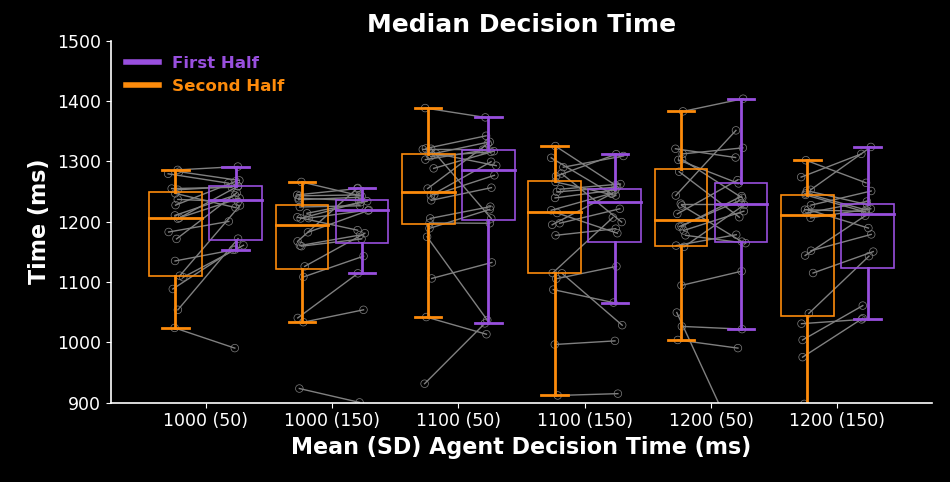

In [20]:
metric1 = np.nanmedian(group_first.player_task_leave_time,axis=2) 
metric2 = np.nanmedian(group_second.player_task_leave_time,axis=2) 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(900,1600,100)
bw = 0.75
pf.multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
pf.multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.purple,wheel.rak_orange],fontsize=12)

axmain.set_axis_off()
plt.show()

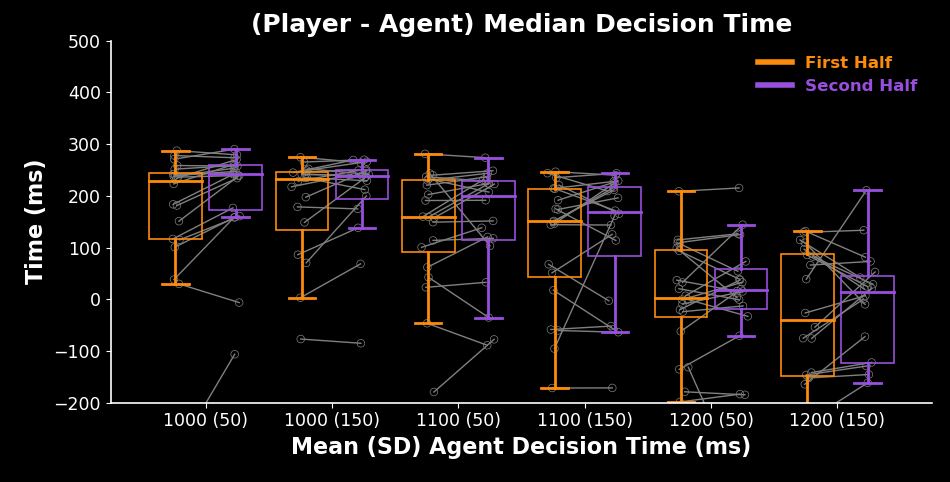

In [19]:
metric1 = np.nanmedian(group_first.combine_all_subjects('player_minus_agent_task_leave_time'),axis=2) 
metric2 = np.nanmedian(group_second.combine_all_subjects('player_minus_agent_task_leave_time'),axis=2) 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(-200,600,100)
bw = 0.75
pf.multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
pf.multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('(Player - Agent) Median Decision Time')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

Wins

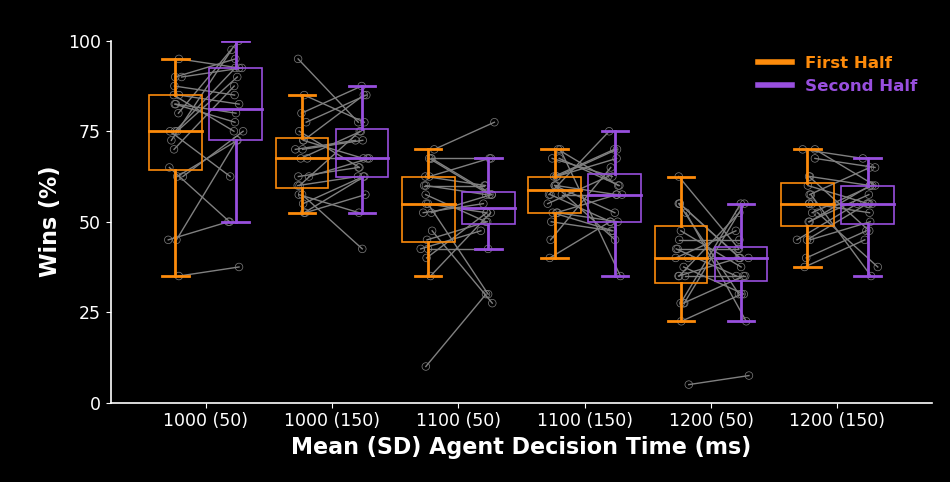

In [17]:
metric1 = group_first.combine_all_subjects('player_perc_wins') 
metric2 = group_second.combine_all_subjects('player_perc_wins') 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,125,25)
bw = 0.75
pf.multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
pf.multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
ax.set_title('')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

Indecisions

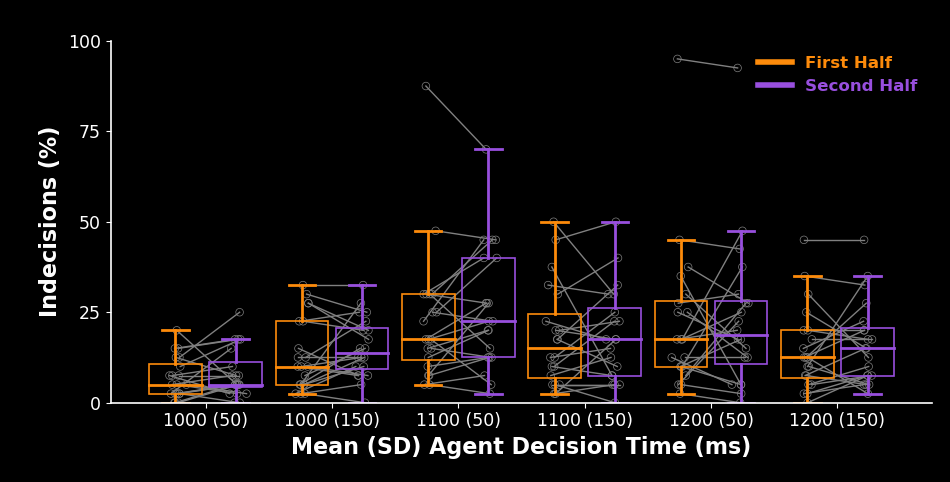

In [18]:
metric1 = group_first.combine_all_subjects('player_perc_indecisions') 
metric2 = group_second.combine_all_subjects('player_perc_indecisions') 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,125,25)
bw = 0.75
pf.multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
pf.multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

Incorrects

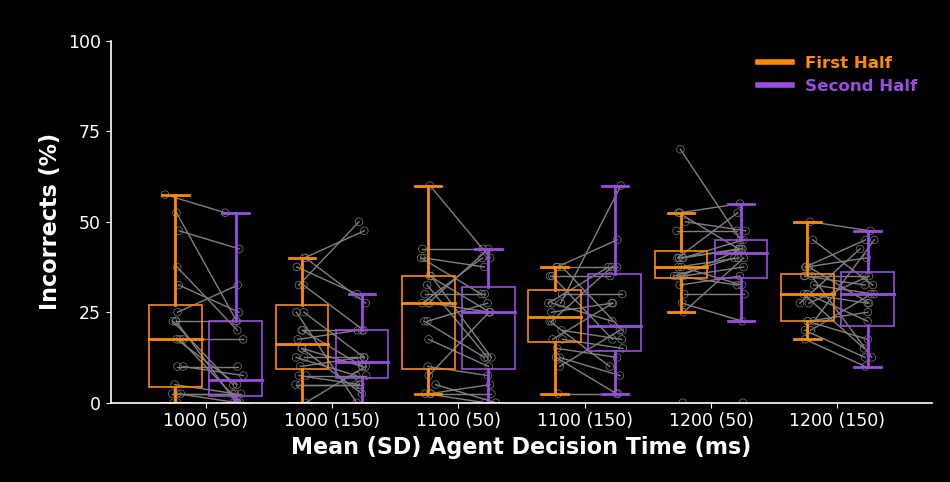

In [22]:
metric1 = group_first.combine_all_subjects('player_perc_incorrects') 
metric2 = group_second.combine_all_subjects('player_perc_incorrects') 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,125,25)
bw = 0.75
pf.multi_boxplot(ax,metric1,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.rak_orange)
pf.multi_boxplot(ax,metric2,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-bw/1.75,bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1[:,j],metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
ax.set_title('')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

### Reaction and Gamble


First Half Second Half Reaction and Gamble Decisions

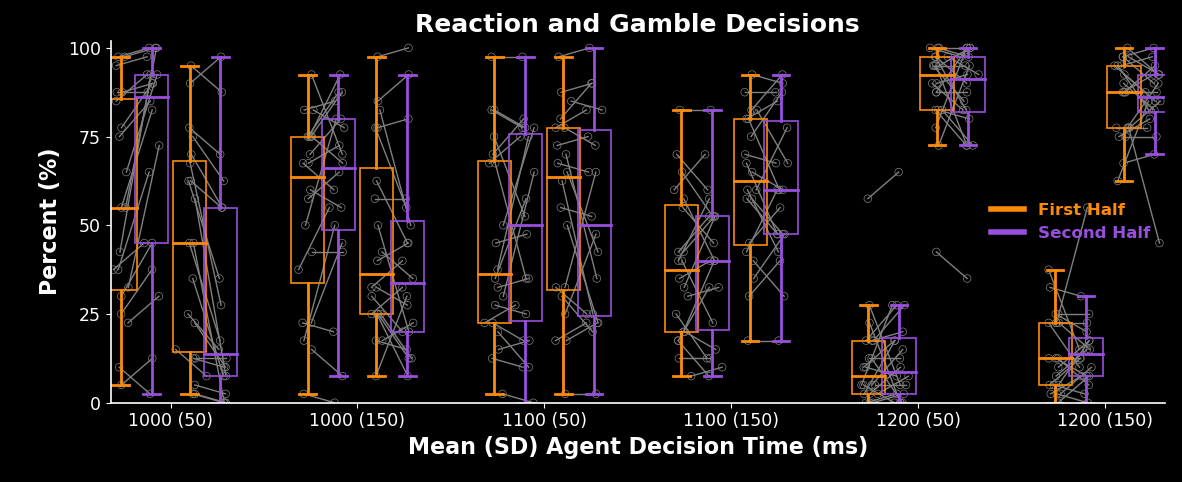

In [21]:
metric1a = group_first.combine_all_subjects('perc_reaction_decisions') 
metric1b = group_second.combine_all_subjects('perc_reaction_decisions') 
metric2a = group_first.combine_all_subjects('perc_gamble_decisions') 
metric2b = group_second.combine_all_subjects('perc_gamble_decisions') 

w,h = 15,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,125,25)
bw = 0.4
pf.multi_boxplot(ax,metric1a,xlocs=xlocs-1.5*bw,box_width = bw,colors = wheel.rak_orange)
pf.multi_boxplot(ax,metric1b,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.purple)
pf.multi_boxplot(ax,metric2a,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.rak_orange)
pf.multi_boxplot(ax,metric2b,xlocs=xlocs+1.5*bw,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-1.5*bw,-bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1a[:,j],metric1b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        x_pos = m + np.array([bw/1.75,1.5*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric2a[:,j],metric2b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs)+2)

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Percent (%)')
ax.set_title('Reaction and Gamble Decisions')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

Reaction and Gamble Mean Decision Time

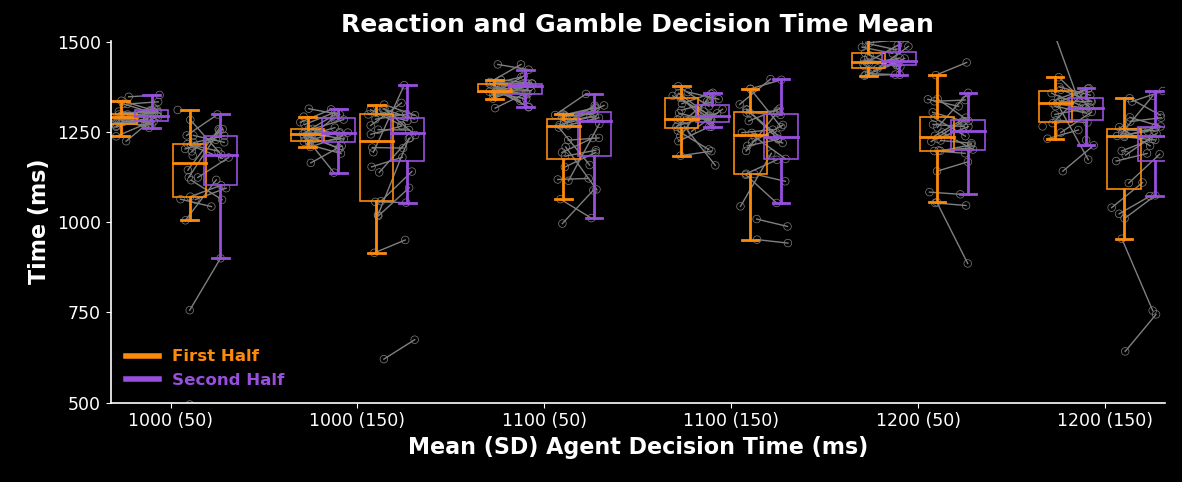

In [ ]:
metric1a = group_first.combine_all_subjects('player_reaction_leave_time_median') 
metric1b = group_second.combine_all_subjects('player_reaction_leave_time_median') 
metric2a = group_first.combine_all_subjects('player_gamble_leave_time_median') 
metric2b = group_second.combine_all_subjects('player_gamble_leave_time_median') 

w,h = 15,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(500,1600,250)
bw = 0.4
multi_boxplot(ax,metric1a,xlocs=xlocs-1.5*bw,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric1b,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.purple)
multi_boxplot(ax,metric2a,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2b,xlocs=xlocs+1.5*bw,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-1.5*bw,-bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1a[:,j],metric1b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        x_pos = m + np.array([bw/1.75,1.5*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric2a[:,j],metric2b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs)+2)

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Reaction and Gamble Decision Time Mean')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()

SD of Reaction and Gamble Decision Time

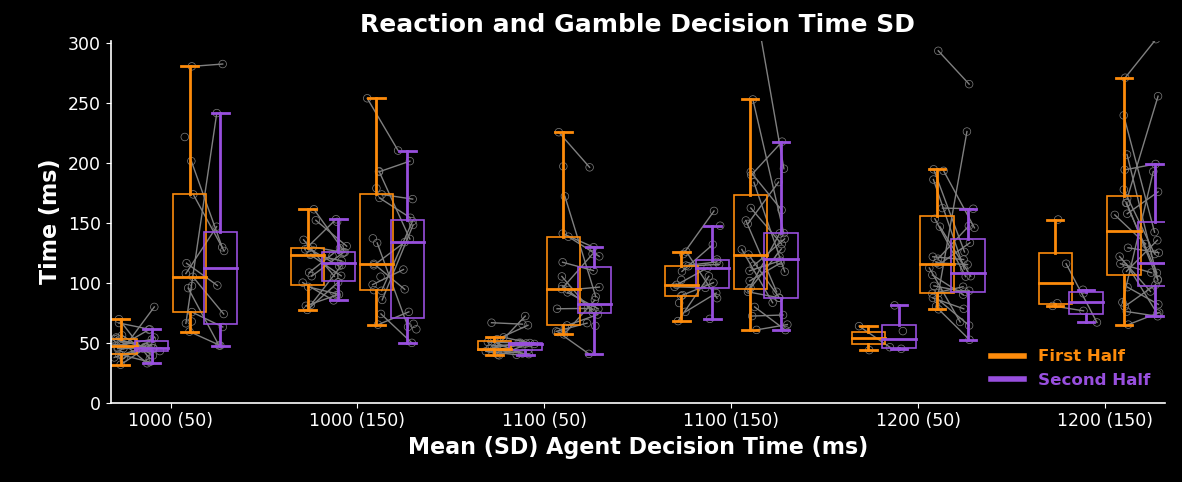

In [ ]:
metric1a = group_first.combine_all_subjects('player_reaction_leave_time_sd') 
metric1b = group_second.combine_all_subjects('player_reaction_leave_time_sd') 
metric2a = group_first.combine_all_subjects('player_gamble_leave_time_sd') 
metric2b = group_second.combine_all_subjects('player_gamble_leave_time_sd') 

w,h = 15,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))*0.75
ylocs = np.arange(0,350,50)
bw = 0.4
multi_boxplot(ax,metric1a,xlocs=xlocs-1.5*bw,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric1b,xlocs=xlocs-bw/1.75,box_width = bw,colors = wheel.purple)
multi_boxplot(ax,metric2a,xlocs=xlocs+bw/1.75,box_width = bw,colors = wheel.rak_orange)
multi_boxplot(ax,metric2b,xlocs=xlocs+1.5*bw,box_width = bw,colors = wheel.purple)
for j in range(num_blocks):     
        m = np.array([xlocs[j],xlocs[j]])
        x_pos = m + np.array([-1.5*bw,-bw/1.75])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric1a[:,j],metric1b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)
        x_pos = m + np.array([bw/1.75,1.5*bw])
        dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[metric2a[:,j],metric2b[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 1)

# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.75,data_list=metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.75,data_list=metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs)+2)

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Reaction and Gamble Decision Time SD')

dv.Custom_Legend(ax,labels=['First Half','Second Half'],colors=[wheel.rak_orange,wheel.purple],fontsize=12)

axmain.set_axis_off()
plt.show()